<a href="https://colab.research.google.com/github/zanuarts/DataMining/blob/master/01_DM_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset Golf

### Load Dataset

In [45]:
import pandas as pd
from sklearn.datasets import load_iris
 
df = pd.read_csv('Golf.csv')

### Lihat Dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           14 non-null     int64 
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     object
 3   Humidity     14 non-null     object
 4   Windy        14 non-null     bool  
 5   Play         14 non-null     object
dtypes: bool(1), int64(1), object(4)
memory usage: 702.0+ bytes


In [47]:
df

,No,Outlook,Temperature,Humidity,Windy,Play
0,1,sunny,hot,high,False,no
1,2,sunny,hot,high,True,no
2,3,cloudy,hot,high,False,yes
3,4,rainy,mild,high,False,yes
4,5,rainy,cool,normal,False,yes
5,6,rainy,cool,normal,True,yes
6,7,cloudy,cool,normal,True,yes
7,8,sunny,mild,high,False,no
8,9,sunny,cool,normal,False,yes
9,10,rainy,mild,normal,False,yes


### Data Preprocessing

In [48]:
# drop kolom No
df.drop('No', axis=1, inplace=True)

# ubah menjadi 0 dan 1 dan 2
df['Outlook'].replace(['sunny', 'cloudy', 'rainy'], [0,1,2], inplace = True)
df['Temperature'].replace(['hot', 'mild', 'cool'], [0,1,2], inplace = True)
df['Humidity'].replace(['normal', 'high'], [0,1], inplace = True)


In [37]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,cloudy,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,yes
6,cloudy,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [27]:
one_hot_data = pd.get_dummies(df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])

one_hot_data

,Windy,Outlook_cloudy,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


### Menentukan Atribut dan Label

In [50]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df['Play']

### Membuat Model Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediksi Model

In [52]:
tree_model.predict([[2,0,1,0]])

array(['yes'], dtype=object)

### Visualisasi Model

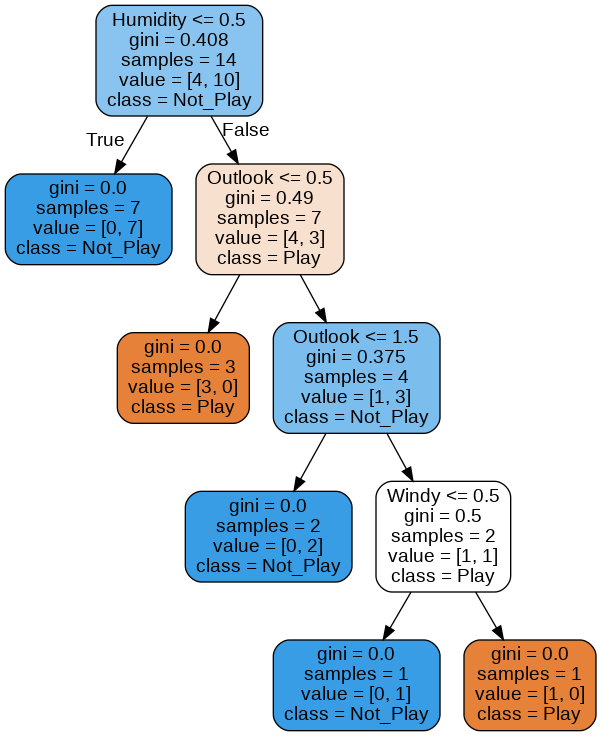

In [53]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = ['Outlook', 'Temperature', 'Humidity', 'Windy'],
    class_names = ['Play', 'Not_Play'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Dataset Iris

### Load Dataset

In [55]:
from sklearn.datasets import load_iris
 
iris = pd.read_csv('Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
iris.drop('Id', axis=1, inplace=True)

In [58]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [59]:
from sklearn.tree import DecisionTreeClassifier

iris_model = DecisionTreeClassifier()

iris_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
iris_model.predict([[6.2, 3.4, 5.4, 2.3]])

array(['Iris-virginica'], dtype=object)

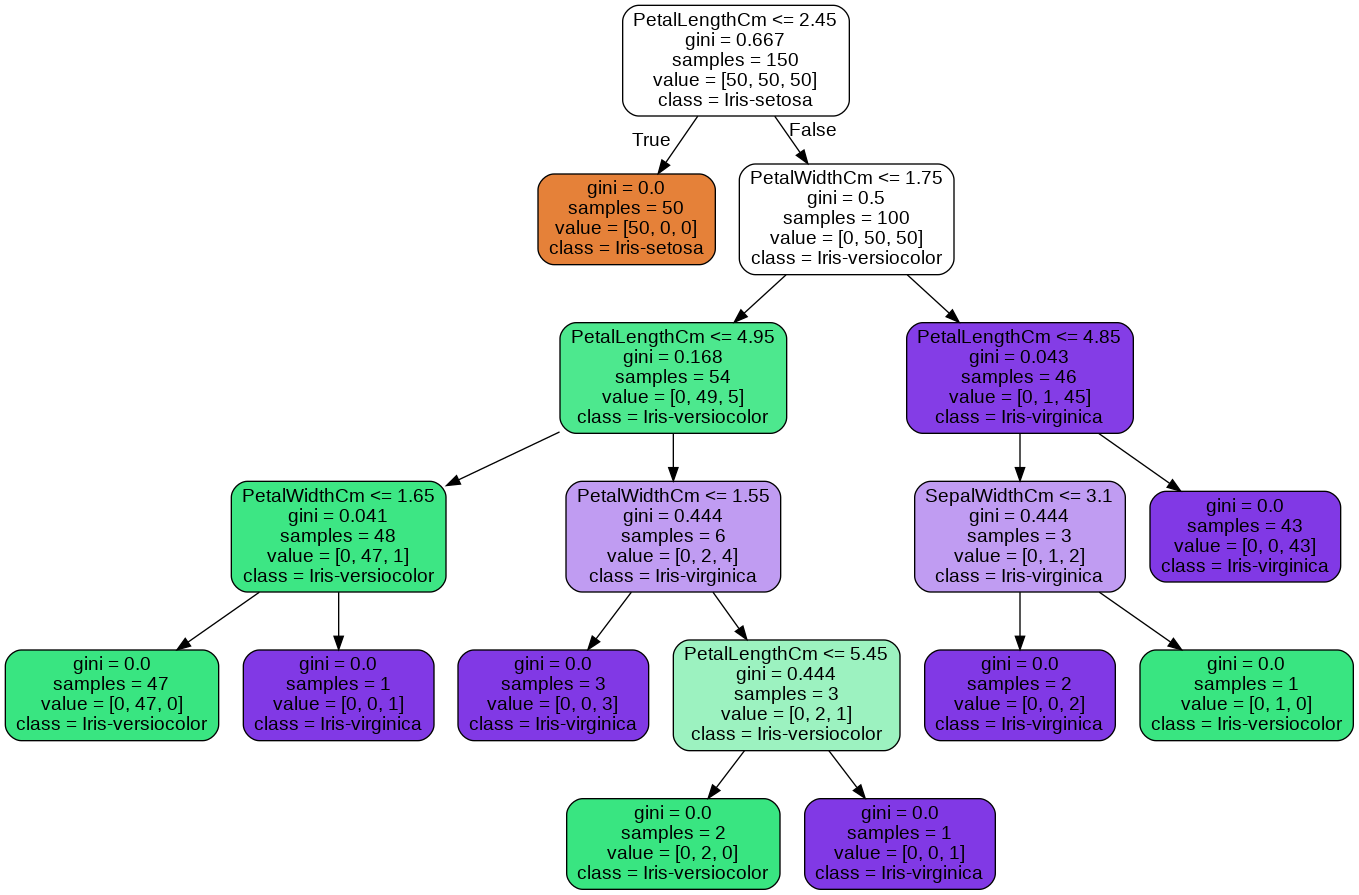

In [61]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    iris_model,
    out_file = None,
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versiocolor', 'Iris-virginica'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Sonar Dataset (C4.5)

In [63]:
sonar = pd.read_csv('sonar.all-data.csv')

sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0

In [84]:
X = sonar.loc[:,'0.0200':'0.0032']
y = sonar['R']

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [93]:
from sklearn.tree import DecisionTreeClassifier

sonar_model = DecisionTreeClassifier()

sonar_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
from sklearn.preprocessing import StandardScaler

acc = sonar_model.score(X_test, y_test)
print('Model Accuracy : ', acc)

Model Accuracy :  0.6923076923076923


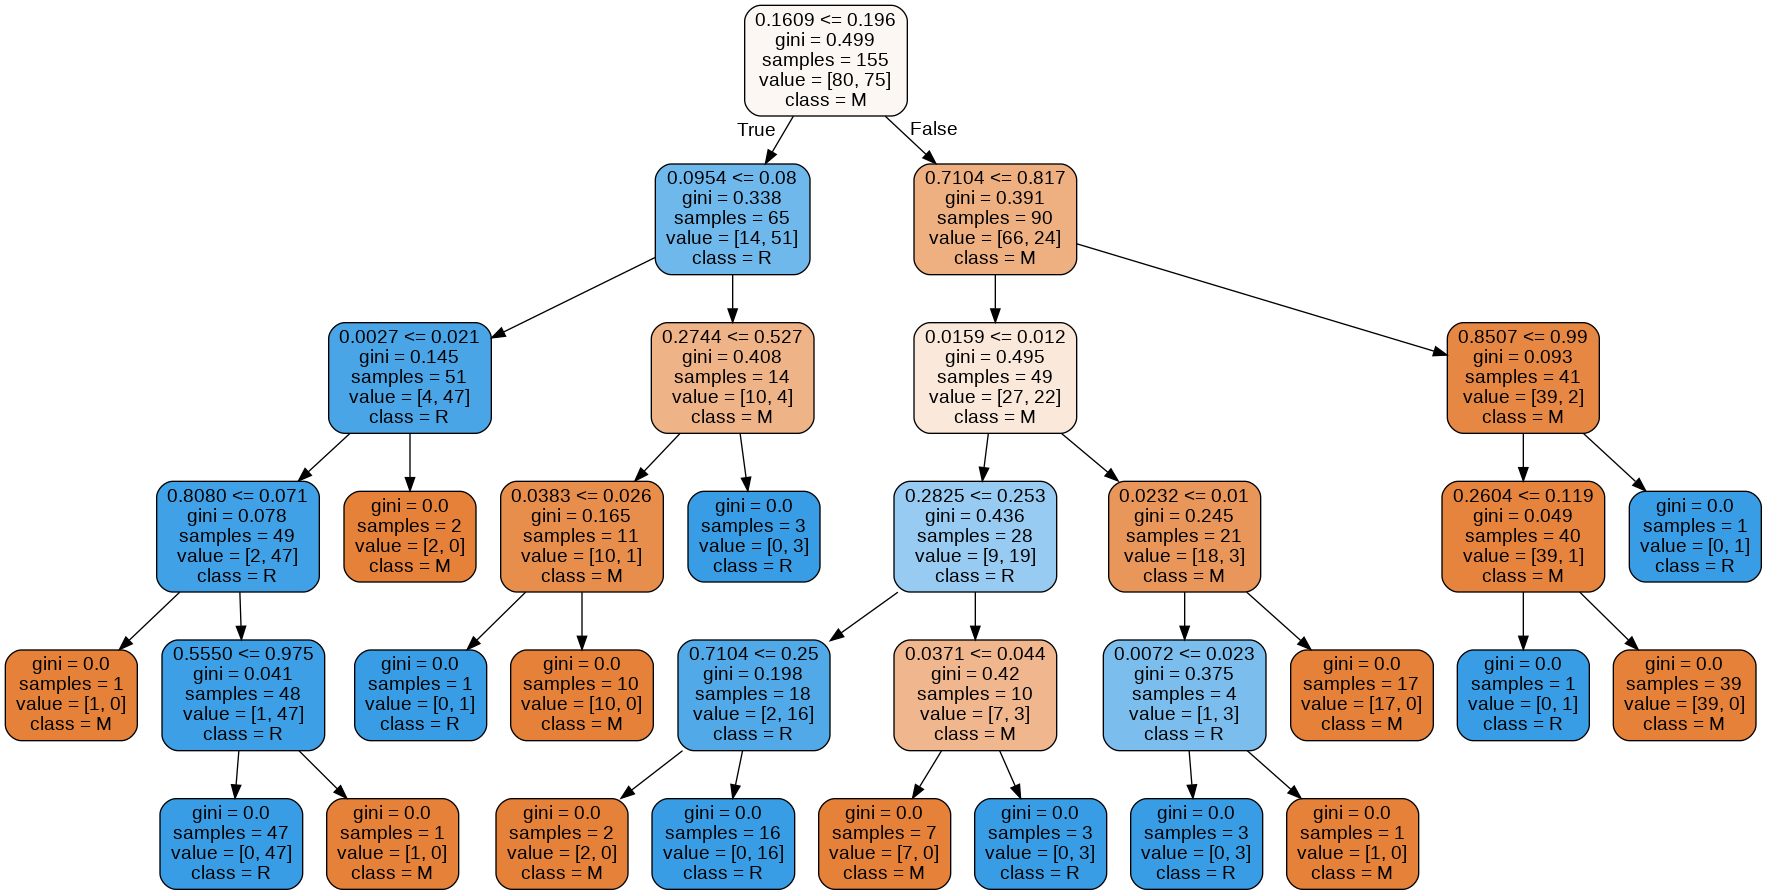

In [131]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    sonar_model,
    out_file = None,
    feature_names = ['0.0200', '0.0371',	'0.0428',	'0.0207',	'0.0954',	'0.0986',
                     '0.1539', '0.1601',	'0.3109',	'0.2111',	'0.1609',	'0.1582',	
                     '0.2238', '0.0645',	'0.0660',	'0.2273',	'0.3100',	'0.2999',	
                     '0.5078', '0.4797',	'0.5783',	'0.5071',	'0.4328',	'0.5550',	
                     '0.6711',	'0.6415',	'0.7104',	'0.8080',	'0.6791',	'0.3857',	
                     '0.1307',	'0.2604',	'0.5121',	'0.7547',	'0.8537',	'0.8507',	
                     '0.6692',	'0.6097',	'0.4943',	'0.2744',	'0.0510',	'0.2834',	
                     '0.2825',	'0.4256',	'0.2641',	'0.1386',	'0.1051',	'0.1343',	
                     '0.0383',	'0.0324',	'0.0232',	'0.0027',	'0.0065',	'0.0159',	
                     '0.0072',	'0.0167',	'0.0180',	'0.0084',	'0.0090',	'0.0032'],
    class_names = ['M', 'R'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Rekomendasi Contact Lenses

In [98]:
lens = pd.read_excel('contact-lenses.xls')

lens

,age,spectacle-prescrip,astigmatism,tear-prod-rate,contact-lenses
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none
5,young,hypermetrope,no,normal,soft
6,young,hypermetrope,yes,reduced,none
7,young,hypermetrope,yes,normal,hard
8,pre-presbyopic,myope,no,reduced,none
9,pre-presbyopic,myope,no,normal,soft


In [119]:
lens['age'].replace(['young', 'pre-presbyopic', 'presbyopic'], [0,1,2], inplace = True)
lens['spectacle-prescrip'].replace(['myope', 'hypermetrope'], [0,1], inplace = True)
lens['astigmatism'].replace(['no', 'yes'], [0,1], inplace = True)
lens['tear-prod-rate'].replace(['reduced', 'normal'], [0,1], inplace = True)

In [120]:
X = lens.loc[:,'age':'tear-prod-rate']
y = lens['contact-lenses']

In [121]:
from sklearn.tree import DecisionTreeClassifier

lens_model = DecisionTreeClassifier()

lens_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
lens_model.predict([[1,0,1,1]])

array(['hard'], dtype=object)

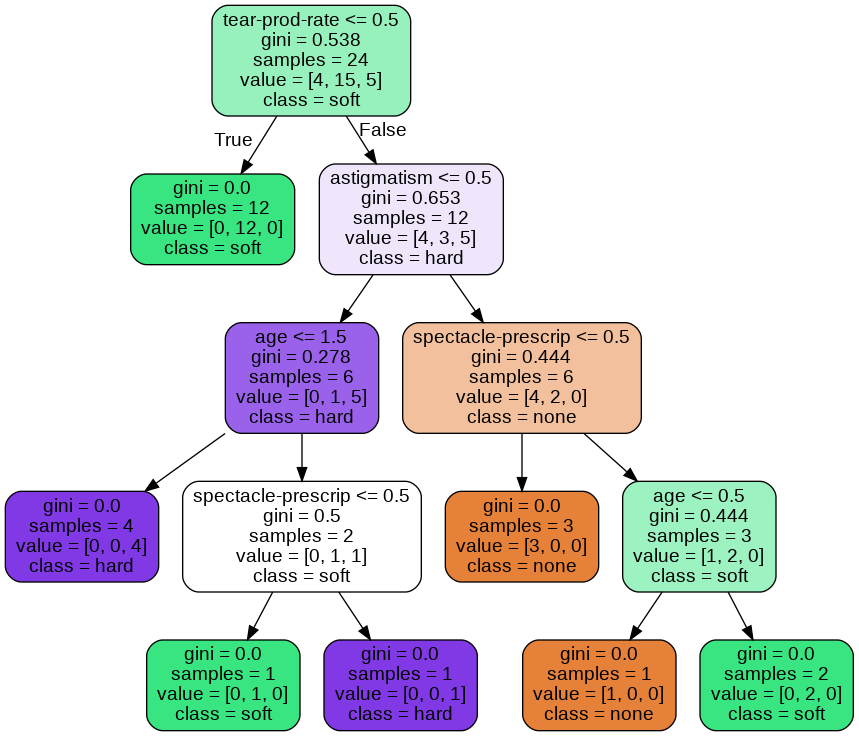

In [127]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    lens_model,
    out_file = None,
    feature_names = ['age','spectacle-prescrip','astigmatism','tear-prod-rate'],
    class_names = ['none', 'soft', 'hard'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())